# Riskified Code Assessment

#### 0: Setup and Exploratory Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Analyst_Coding_Test_(1)_(2).csv")

In [3]:
df.head()

,shape,color,area
0,square,yellow,9409.0
1,circle,yellow,4071.5
2,triangle,blue,2028.0
3,square,blue,3025.0
4,square,blue,9216.0


In [4]:
# Checking for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   shape   1000 non-null   object 
 1   color   1000 non-null   object 
 2   area    1000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


In [5]:
df['shape'].value_counts()

square      477
triangle    403
circle      120
Name: shape, dtype: int64

In [6]:
df['color'].value_counts()

blue      360
red       290
yellow    272
green      78
Name: color, dtype: int64

In [7]:
df['area'].describe()

count     1000.000000
mean      3945.289900
std       4754.205318
min          0.800000
25%        758.250000
50%       2610.800000
75%       5492.450000
max      31415.900000
Name: area, dtype: float64

#### 1: Draw a Boxplot displaying the area distribution of the shapes

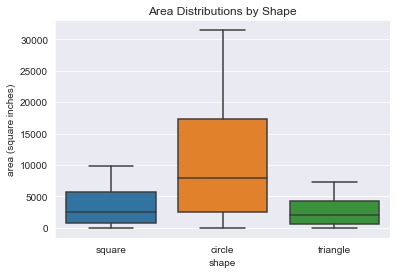

In [12]:
fig, ax = plt.subplots()

sns.set_style('darkgrid')
sns.boxplot(x = df['shape'], y = df['area'], ax = ax)

ax.set_title('Area Distributions by Shape')
ax.set_ylabel('area (square inches)')

plt.show()

#### 2: Calculate the mean, max, and standard deviation of the area for each color

In [15]:
def get_color_info(color):
    """
    Returns the mean, max, and standard deviation for a given color
    If the color doesn't exist, will return NaNs
    """
    color_df = df.loc[df['color'] == color]

    return {'mean' : color_df['area'].describe()['mean'], 'max' : color_df['area'].describe()['max'], 'std' : color_df['area'].describe()['std']}


In [16]:
get_color_info('green')

{'mean': 5761.119230769232, 'max': 27759.1, 'std': 6695.029606348661}

In [17]:
get_color_info('blue')

{'mean': 3208.1316666666735, 'max': 21642.4, 'std': 3039.2129648171303}

In [18]:
get_color_info('red')

{'mean': 3815.8710344827646, 'max': 31415.9, 'std': 5092.678376780838}

In [19]:
get_color_info('yellow')

{'mean': 4538.208088235295, 'max': 31415.9, 'std': 5352.460578324455}

In [20]:
get_color_info('purple')

{'mean': nan, 'max': nan, 'std': nan}

#### 3: Calculate the average area of a yellow square

In [33]:
df.loc[df['shape'] == 'square'].loc[df['color'] == 'yellow']['area'].agg('mean')

3333.2072072072074

#### 4: Calculate which shape is most likely to be green

#### 5: Calculate the odds of each shape given the area is greater than 3,000 and the color is red

#### 6: Define a function that calculates the side or radius of a shape 

#### 7: Create new column for the side or radius of each shape (as an int) 

#### 8: Draw a boxplot of each side/radius by shape and make inferences

#### 9: Draw a scatterplot with the given constraints: x = side, y = area, color = shape 

#### 10: Create dataframes for the following scenarios for each shape

10 a: Proportion of red objects to total objects

10 b: Proportion of blue area to total area

#### 11: Define a function that calculates the proportion of a color's area to the total area by shape